In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("/content/twitter_validation.csv")
df
df=pd.read_csv("/content/twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [11]:
print(df.isnull().sum())

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [12]:
train_df = pd.read_csv("twitter_training.csv", header=None, names=["entity", "sentiment", "text"])
valid_df = pd.read_csv("twitter_validation.csv", header=None, names=["entity", "sentiment", "text"])


In [14]:
df = pd.concat([train_df, valid_df], ignore_index=True)
df

,entity,sentiment,text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
75677,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
print(f"Combined Dataset Shape: {df.shape}")
print(df.head())

Combined Dataset Shape: (75682, 3)
        entity sentiment                                               text
0  Borderlands  Positive  im getting on borderlands and i will murder yo...
1  Borderlands  Positive  I am coming to the borders and I will kill you...
2  Borderlands  Positive  im getting on borderlands and i will kill you ...
3  Borderlands  Positive  im coming on borderlands and i will murder you...
4  Borderlands  Positive  im getting on borderlands 2 and i will murder ...


In [16]:
df.dropna(subset=["text"], inplace=True)

In [17]:
sentiment_counts = df["sentiment"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

Sentiment Distribution:
 sentiment
Negative      22624
Positive      20932
Neutral       18393
Irrelevant    13047
Name: count, dtype: int64


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [19]:
df[['text', 'clean_text']].head()

,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


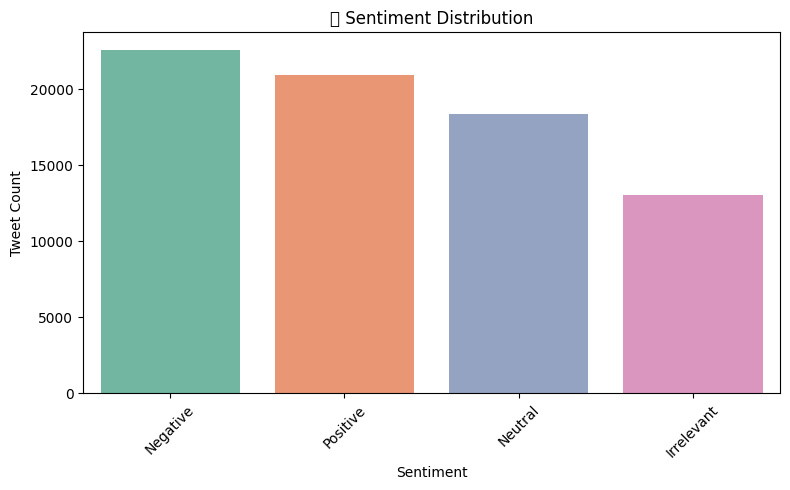

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='Set2')
plt.title("📊 Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


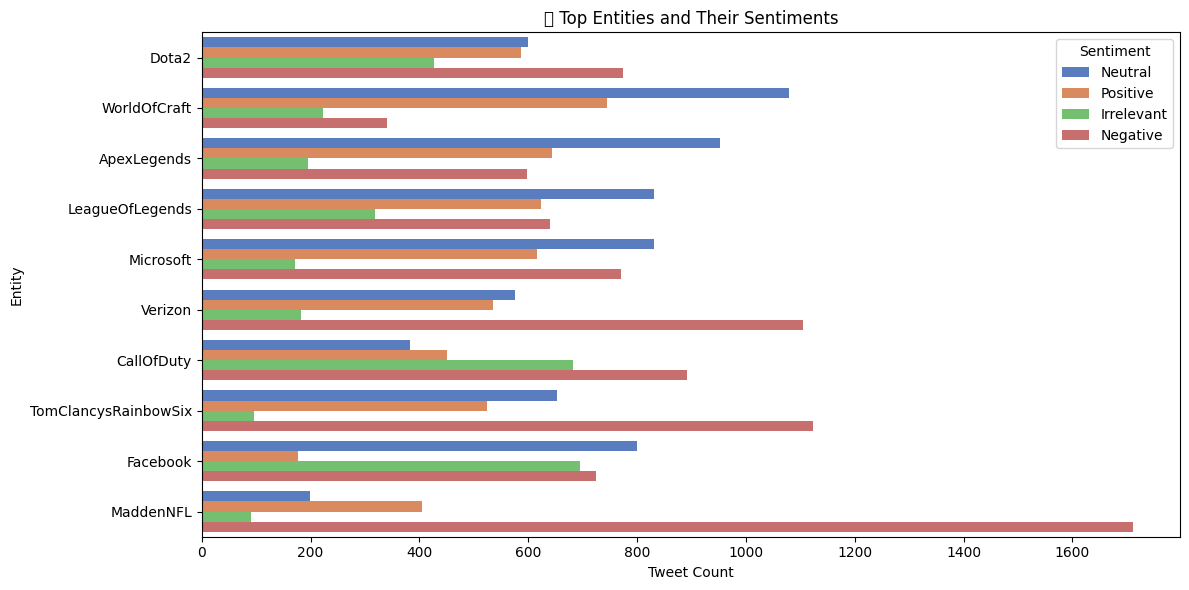

In [21]:
top_entities = df['entity'].value_counts().nlargest(10).index
df_top_entities = df[df['entity'].isin(top_entities)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_entities, y='entity', hue='sentiment', palette='muted')
plt.title("🧩 Top Entities and Their Sentiments")
plt.xlabel("Tweet Count")
plt.ylabel("Entity")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


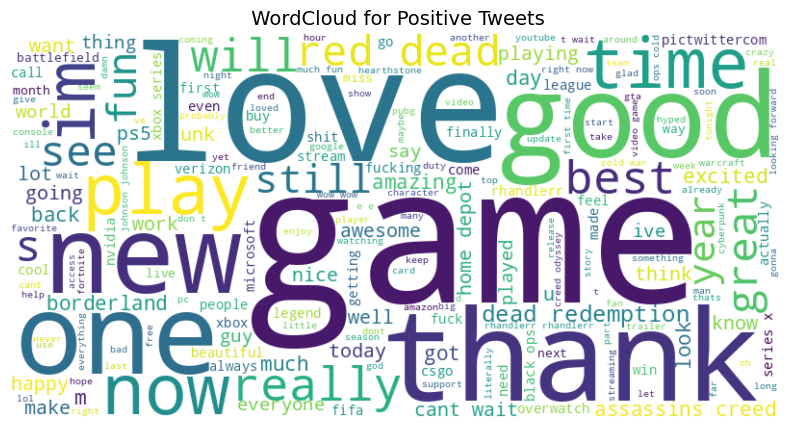

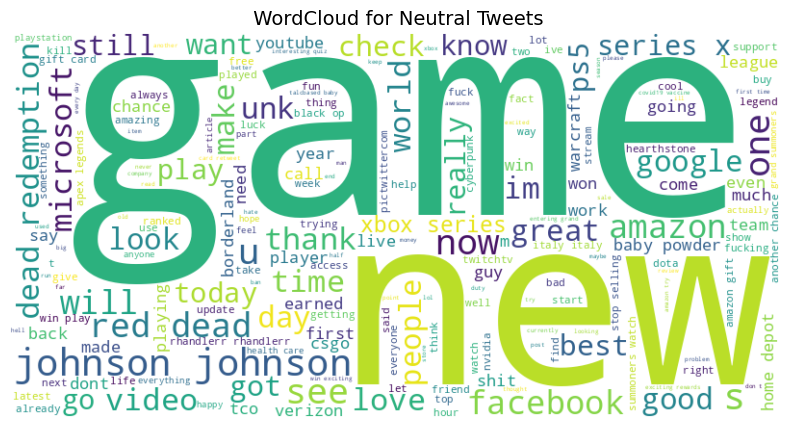

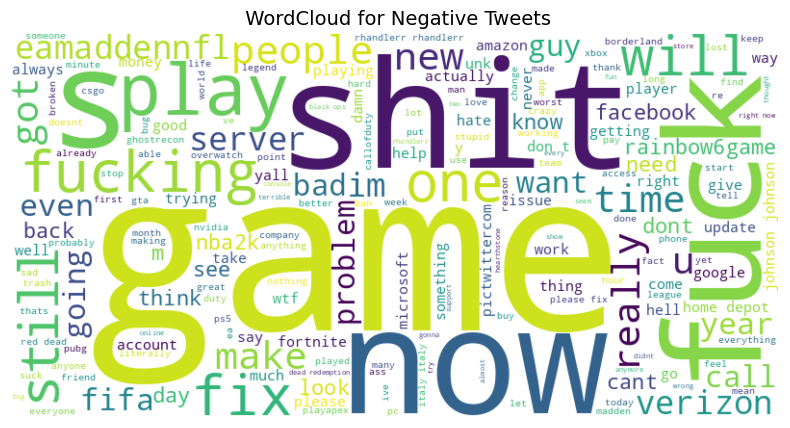

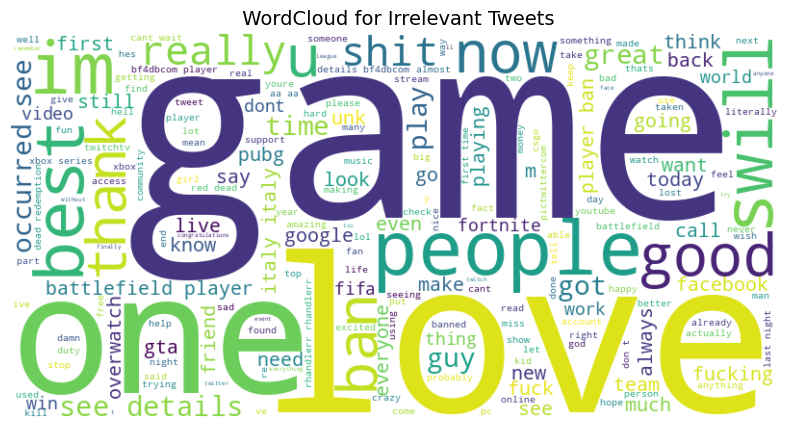

In [23]:
def plot_wordcloud(data, sentiment):
    text = " ".join(data[data['sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f" WordCloud for {sentiment} Tweets", fontsize=14)
    plt.show()

for sent in df['sentiment'].unique():
    plot_wordcloud(df, sent)


In [24]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [2]:
for sentiment in df['sentiment'].unique():
    print(f"\n Top words for sentiment: {sentiment}")
    top_words = get_top_n_words(df[df['sentiment'] == sentiment]['clean_text'], n=10)
    for word, freq in top_words:
        print(f"{word}: {freq}")

NameError: name 'df' is not defined

In [ ]:
!git config --global user.name ""
!git config --global user.email "your-email@example.com"
